##### Jueves 3 de Abril de 2025
##### Gomez Trejo Ezequiel

# Regresión Lineal Múltiple. E-Commerce

#### El objetivo es predecir cuánto gasta un cliente al año

#### Paso 1. Importar librerías

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Paso 2. Importación y Exploración de datos

In [15]:
ecommerce = pd.read_csv('EcommerceCustomers.csv')

In [16]:
#Exploración
print("\nE-COMMERCE CUSTOMERS\n")
print("Primeras 5 líneas del Dataset: \n")
print(ecommerce.head())


E-COMMERCE CUSTOMERS

Primeras 5 líneas del Dataset: 

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.11

In [17]:
print("\nEstadísticas descriptivas: \n")
print(ecommerce.describe())


Estadísticas descriptivas: 

       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.

In [18]:
print("\nInformación del Dataset:\n")
print(ecommerce.info())


Información del Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


In [19]:
print("\nColumnas del Dataset: \n")
print(ecommerce.columns)


Columnas del Dataset: 

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


In [20]:
print("\nMatriz de Correlación: \n")
print(ecommerce.corr(numeric_only=True))


Matriz de Correlación: 

                      Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000  


#### Paso 3. División de Datos

In [29]:
x = ecommerce[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y = ecommerce['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,
    random_state=42
)

In [23]:
print(f"Los datos de x entrenamiento son: {x_train.shape[0]}")
print(f"Los datos de x test son: {x_test.shape[0]}")

Los datos de x entrenamiento son: 400
Los datos de x test son: 100


#### Paso 4. Entrenar el modelo

In [10]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

#### Paso 5. Evaluar el modelo

In [27]:
y_pred = modelo.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ecuacion = f'y = {modelo.coef_[0]:.2f}x + {modelo.intercept_:.2f}'
print("\n---Métricas de evaluación del modelo--- \n")
print(f"R2(Coeficiente de determinación): {r2:.4f} \n")
print(f"RMSE(Raíz del error cuadrático medio): {rmse:.4f} \n")
print(f"Ecuación del modelo: {ecuacion}")


---Métricas de evaluación del modelo--- 

R2(Coeficiente de determinación): 0.9777 

RMSE(Raíz del error cuadrático medio): 10.5035 

Ecuación del modelo: y = 25.60x + -1033.12


#### Paso 6. Gráfico Predicciones VS Valores reales

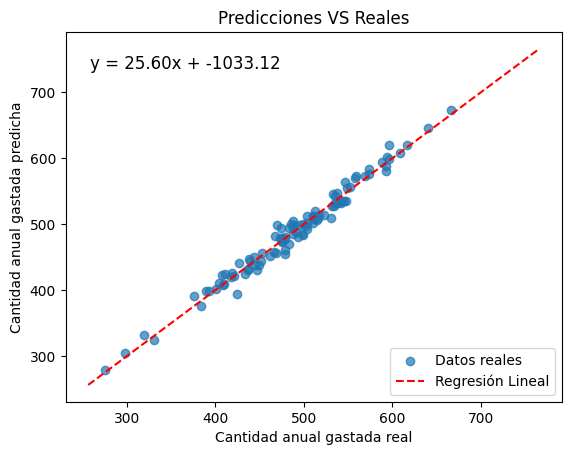

In [28]:
plt.title('Predicciones VS Reales')
plt.xlabel('Cantidad anual gastada real')
plt.ylabel('Cantidad anual gastada predicha')
plt.scatter(y_test, y_pred, alpha=0.7, label='Datos reales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Regresión Lineal')
# Ecuación de regresión 
ecuacion = f'y = {modelo.coef_[0]:.2f}x + {modelo.intercept_:.2f}'
plt.text(0.05, 0.9, ecuacion, transform=plt.gca().transAxes, fontsize=12, color='black')
plt.legend()
plt.show()

#### Paso 7. Predicción

In [31]:
#Datos de un nuevo proyecto

print("\nE-COMMERCE CUSTOMERS")

nuevo_gasto = pd.DataFrame({
    'Avg. Session Length': [40],
    'Time on App': [15],
    'Length of Membership': [6]
})

costo_predicho = modelo.predict(nuevo_gasto)

#Predecir 
costo_predicho = modelo.predict(nuevo_gasto)
print("\nDatos del nuevo costo: \n")
print(f"Duración promedio sesión: {nuevo_gasto['Avg. Session Length'].values[0]}")
print(f"Tiempo en la app: {nuevo_gasto['Time on App'].values[0]}")
print(f"Duración de Membresía: {nuevo_gasto['Length of Membership'].values[0]}")
print(f"\nEl costo predicho anual con los datos anteriores será de: ${costo_predicho[0]:.2f}\n")


E-COMMERCE CUSTOMERS

Datos del nuevo costo: 

Duración promedio sesión: 40
Tiempo en la app: 15
Duración de Membresía: 6

El costo predicho anual con los datos anteriores será de: $944.31

